In [1]:
'''
Regression Module

This module contains code for performing regression analysis using both linear regression and neural networks.
It includes functions and pipelines for data preprocessing, model training, and evaluation. The main components
include the use of scikit-learn and Keras for building and training regression models.

Note: This module assumes that the necessary libraries such as pandas, matplotlib and keras are installed.

'''

'\nRegression Module\n\nThis module contains code for performing regression analysis using both linear regression and neural networks.\nIt includes functions and pipelines for data preprocessing, model training, and evaluation. The main components\ninclude the use of scikit-learn and Keras for building and training regression models.\n\nNote: This module assumes that the necessary libraries such as pandas, matplotlib and keras are installed.\n\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import regression_pipelines as rp
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from keras.optimizers import RMSprop


In [3]:
plt.rcParams.update(
    {
        "axes.grid": True,
        "grid.alpha": 0.5,
        "grid.linestyle": "--"
    }
)


## Import data

In [4]:
df = pd.read_csv("../data/FS_features_ABIDE_males.csv", sep=";")
df = df.set_index("FILE_ID")

# drop target
y = df["AGE_AT_SCAN"].values
df = df.drop(["AGE_AT_SCAN", "SEX"], axis=1).values

In [5]:
results_regressor = rp.linear_regressor_pipeline(df, y, verbose=1, seed=rp.SEED)
results_regressor.to_csv("best_model_regressor.csv", index=False)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Done!


In [66]:
pd.read_csv("best_model_regressor.csv").head(1).T

,0
mean_fit_time,0.512901
std_fit_time,0.015664
mean_score_time,0.011489
std_score_time,0.000189
param_model__alpha,1
params,{'model__alpha': 1}
split0_test_score,0.705735
split1_test_score,0.660429
split2_test_score,0.701759
split3_test_score,0.615421


## Neural network

In [6]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    restore_best_weights=True,
)

# set up MLP model
mlp = KerasRegressor(
    rp.n_layers_feed_forward, 
    epochs=200, 
    loss="mse",
    callbacks=[callback],
    validation_split=0.2,
    nlayers=3,
    hiddens=[2,2,2],
    dropouts=[0.2, 0, 0],
    verbose=0,
)

In [7]:
results_mlp = rp.neural_network_pipeline(mlp, df, y, niter=100, verbose=3, seed=rp.SEED)

Starting grid search neural_network...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END mlp__dropouts=[0.  0.  0.3 0.3 0.  0.1], mlp__hiddens=(4, 8, 16, 64, 16, 16), mlp__nlayers=5, mlp__optimizer__learning_rate=0.005;, score=(train=0.707, test=0.629) total time=   1.5s
[CV 2/5] END mlp__dropouts=[0.  0.  0.3 0.3 0.  0.1], mlp__hiddens=(4, 8, 16, 64, 16, 16), mlp__nlayers=5, mlp__optimizer__learning_rate=0.005;, score=(train=0.738, test=0.710) total time=   1.6s
[CV 3/5] END mlp__dropouts=[0.  0.  0.3 0.3 0.  0.1], mlp__hiddens=(4, 8, 16, 64, 16, 16), mlp__nlayers=5, mlp__optimizer__learning_rate=0.005;, score=(train=0.701, test=0.625) total time=   1.5s
[CV 4/5] END mlp__dropouts=[0.  0.  0.3 0.3 0.  0.1], mlp__hiddens=(4, 8, 16, 64, 16, 16), mlp__nlayers=5, mlp__optimizer__learning_rate=0.005;, score=(train=0.664, test=0.616) total time=   1.5s
[CV 5/5] END mlp__dropouts=[0.  0.  0.3 0.3 0.  0.1], mlp__hiddens=(4, 8, 16, 64, 16, 16), mlp__nlayers=5, mlp__op

In [8]:
results_mlp.to_csv("best_model_mlp.csv", index=False)

## Plot

In [5]:
best_model = pd.read_csv("best_model_mlp.csv")
best_model.head(1).T

,0
mean_fit_time,1.407427
std_fit_time,0.043111
mean_score_time,0.076033
std_score_time,0.000587
param_mlp__optimizer__learning_rate,0.005
param_mlp__nlayers,4
param_mlp__hiddens,"(4, 4, 32, 32, 16, 16)"
param_mlp__dropouts,[0.1 0. 0. 0. 0.2 0.3]
params,"{'mlp__optimizer__learning_rate': 0.005, 'mlp_..."
split0_test_score,0.675065


In [10]:
preprocessing_pipe = Pipeline(
    [
        ('scaler', PowerTransformer()),
        ("principal_components", PCA(n_components=20, svd_solver = 'full')),
    ]
)
mlp = rp.n_layers_feed_forward(
    dropouts=[0.1, 0.0, 0.0, 0.0,],
    hiddens=(4, 4, 32, 32),
    nlayers=4,
    meta={"X_shape_":(0, 20)}
)
mlp.compile(optimizer=RMSprop(learning_rate=0.005), loss="mae")
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 84        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 32)                160       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1353 (5.29 KB)
Trainable params: 1353 (5

In [11]:
new_df = preprocessing_pipe.fit_transform(df)

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    restore_best_weights=True,
)

mlp.fit(
    new_df, 
    y, 
    epochs=200, 
    validation_split=0.3, 
    verbose=0, 
    shuffle=True, 
    callbacks=[callback]
)

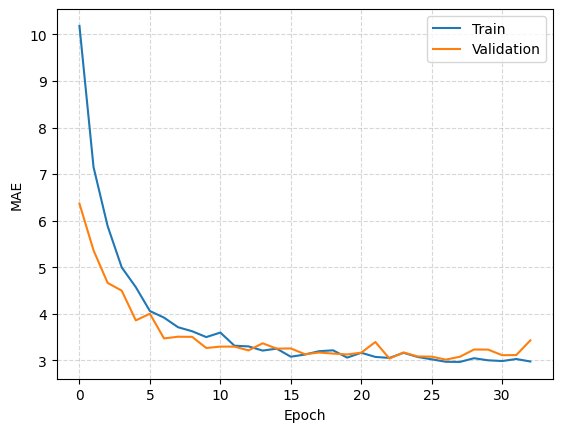

In [13]:
loss_history = mlp.history.history["loss"]
loss_history_val = mlp.history.history["val_loss"]
plt.plot(loss_history, label="Train")
plt.plot(loss_history_val, label="Validation")
plt.xlabel("Epoch")
#plt.yscale("log")
plt.ylabel("MAE")
plt.legend()
